In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [28]:
# Lectura de datos de enrtrada para el cálculo
s_parentpath=Path(r'C:\Alejo\DocumentoVentasGas')
filepath=s_parentpath.joinpath(s_parentpath,'Data.xlsx')

# Carga del nivel probabilístico del embalse
sheet_name='Escenarios'
df_Esc=pd.read_excel(filepath, header=0,sheet_name=sheet_name)
df_Esc = df_Esc.dropna()

9     120.012652
10    253.947486
11     98.598821
Name: Percentil_95, dtype: float64


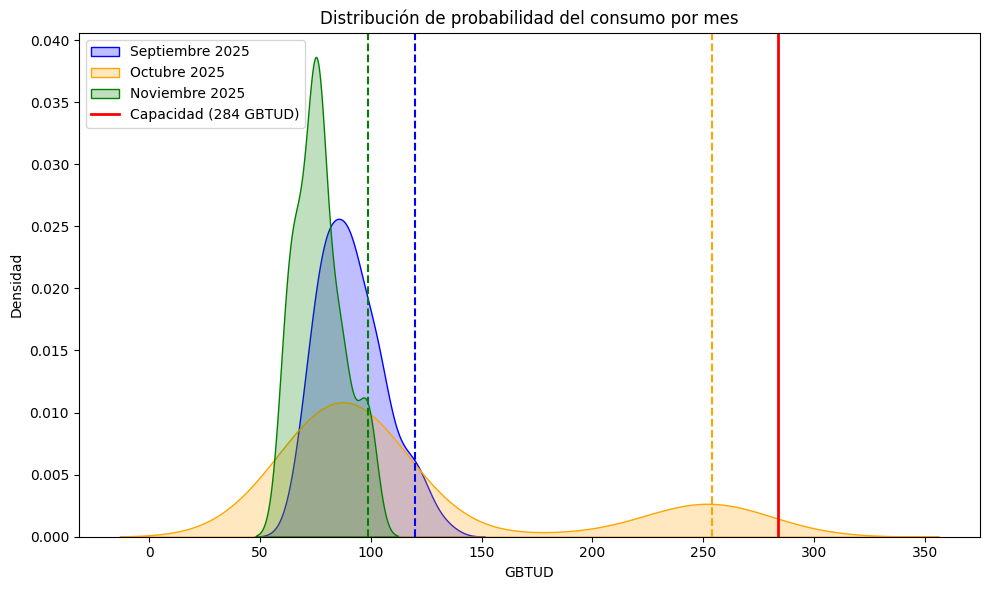

In [29]:
# Calcular el percentil 95 para cada mes incluyendo todos los escenarios
percentiles_95 = {}

for mes in df_Esc['Mes'].unique():
    datos_mes = df_Esc[df_Esc['Mes'] == mes][['Esc1', 'Esc2', 'Esc3']].values.flatten()
    datos_mes = datos_mes[~pd.isnull(datos_mes)]  # Eliminar NaN si existen
    percentiles_95[mes] = pd.Series(datos_mes).quantile(0.95)

percentiles_95 = pd.Series(percentiles_95, name='Percentil_95')
print(percentiles_95)

# # Graficar la distribución de probabilidad para cada mes, incluyendo todos los escenarios y el percentil 95
# fig, axes = plt.subplots(1, len(percentiles_95), figsize=(6 * len(percentiles_95), 5), sharey=True)

# mesnombre=['Septiembre 2025','Octubre 2025', 'Noviembre 2025']

# for i, mes in enumerate(sorted(percentiles_95.index)):
#     ax = axes[i] if len(percentiles_95) > 1 else axes
#     datos_mes = df_Esc[df_Esc['Mes'] == mes][['Esc1', 'Esc2', 'Esc3']].melt(value_name='Valor')
#     sns.kdeplot(data=datos_mes, x='Valor', ax=ax, fill=True)
#     ax.axvline(percentiles_95[mes], color='red', linestyle='--', label='Percentil 95')
#     ax.set_title(f'Distribución {mesnombre[i]}')
#     ax.set_xlabel('GBTUD')
#     ax.set_ylabel('Densidad')
#     ax.legend()

# plt.tight_layout()
# plt.show()

# Graficar todas las distribuciones de probabilidad en una sola gráfica
mesnombre=['Septiembre 2025','Octubre 2025', 'Noviembre 2025']

colores = ['blue', 'orange', 'green']
plt.figure(figsize=(10, 6))

for i, mes in enumerate(sorted(percentiles_95.index)):
    datos_mes = df_Esc[df_Esc['Mes'] == mes][['Esc1', 'Esc2', 'Esc3']].melt(value_name='Valor')
    sns.kdeplot(data=datos_mes, x='Valor', fill=True, color=colores[i], label=mesnombre[i])
    plt.axvline(percentiles_95[mes], color=colores[i], linestyle='--')

# Línea de capacidad
plt.axvline(284, color='red', linestyle='-', linewidth=2, label='Capacidad (284 GBTUD)')

plt.xlabel('GBTUD')
plt.ylabel('Densidad')
plt.title('Distribución de probabilidad del consumo por mes')
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
percentiles_95

9     120.012652
10    253.947486
11     98.598821
Name: Percentil_95, dtype: float64

9     0.533333
10    0.615385
11    0.000000
Name: Probabilidad_supera_umbral, dtype: float64


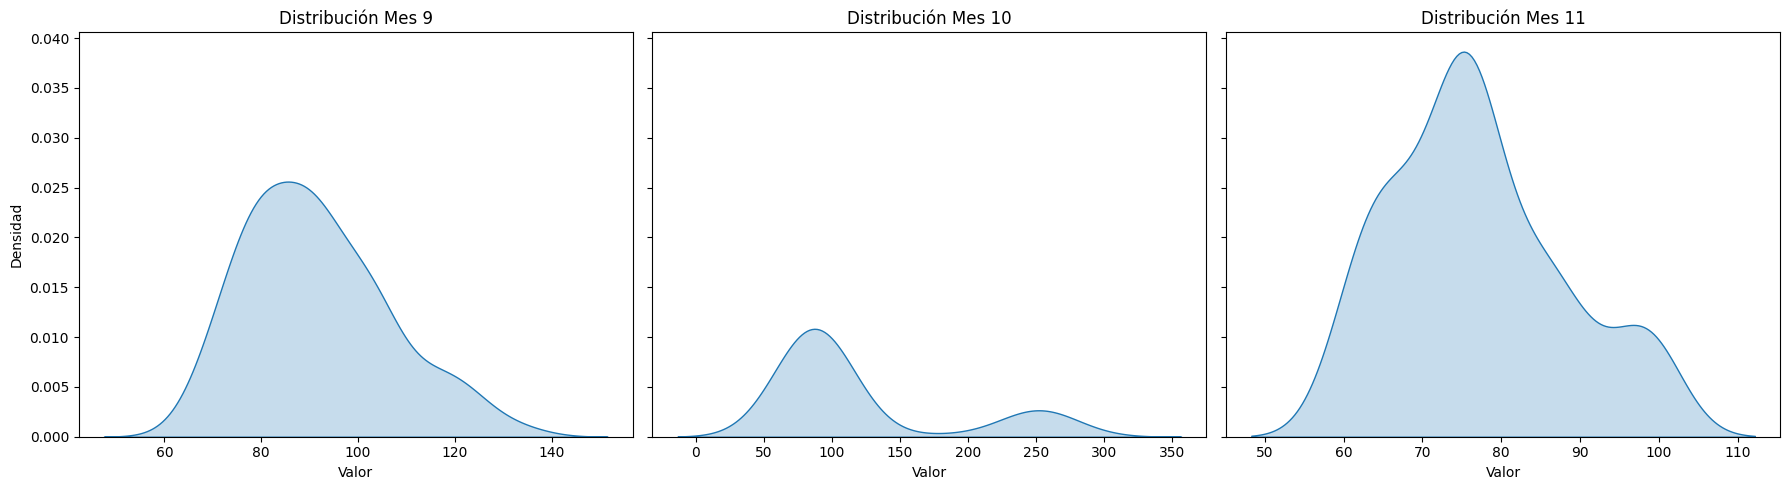

In [ ]:
df_Esc
umbral=100
# Calcular la probabilidad de superar el umbral en cualquier escenario para cada mes
def prob_supera_umbral(df, umbral):
    # Para cada mes, contar cuántos días al menos un escenario supera el umbral
    meses = df['Mes'].unique()
    resultados = {}
    for mes in meses:
        df_mes = df[df['Mes'] == mes]
        supera = (df_mes[['Esc1', 'Esc2', 'Esc3']] > umbral).any(axis=1)
        prob = supera.sum() / len(df_mes)
        resultados[mes] = prob
    return pd.Series(resultados, name='Probabilidad_supera_umbral')

probabilidad_supera_umbral = prob_supera_umbral(df_Esc, umbral)
print(probabilidad_supera_umbral)


# Graficar la distribución de probabilidad para cada mes, incluyendo todos los escenarios
meses = df_Esc['Mes'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, mes in enumerate(sorted(meses)):
    ax = axes[i]
    datos_mes = df_Esc[df_Esc['Mes'] == mes][['Esc1', 'Esc2', 'Esc3']].melt(value_name='Valor')
    sns.kdeplot(data=datos_mes, x='Valor', ax=ax, fill=True)
    ax.set_title(f'Distribución Mes {mes}')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Densidad')

plt.tight_layout()
plt.show()